# <span style='font-family:Futura;font-weight:bold'>NOTEBOOK 1</span>

---

This notebook contains the codes used during the first lecture of the course "Modelling from Measurements". In particular, a simple application of the Singular Value Decomposition (SVD) will be presented with particular focus on the connection with geometric transformation.

In [1]:
%matplotlib notebook 
import numpy as np
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

plt.rcParams.update({'font.size': 12})
plt.rcParams["font.family"] = "Palatino"

In [2]:
n = 40
theta = np.linspace(0, 2 * np.pi, n)  # azimuthal angle
phi = np.linspace(0, np.pi, n)  # polar angle
theta, phi = np.meshgrid(theta, phi)
rho = 1  # sphere radius
x = rho * np.sin(phi) * np.cos(theta)
y = rho * np.sin(phi) * np.sin(theta)
z = rho * np.cos(phi)

Now we will apply a matrix to the coordinate of the sphere points:

$$ x_{ellipse} = A x_{sphere} $$ 

What we will obtain is an hyperellipse.

<IPython.core.display.Javascript object>


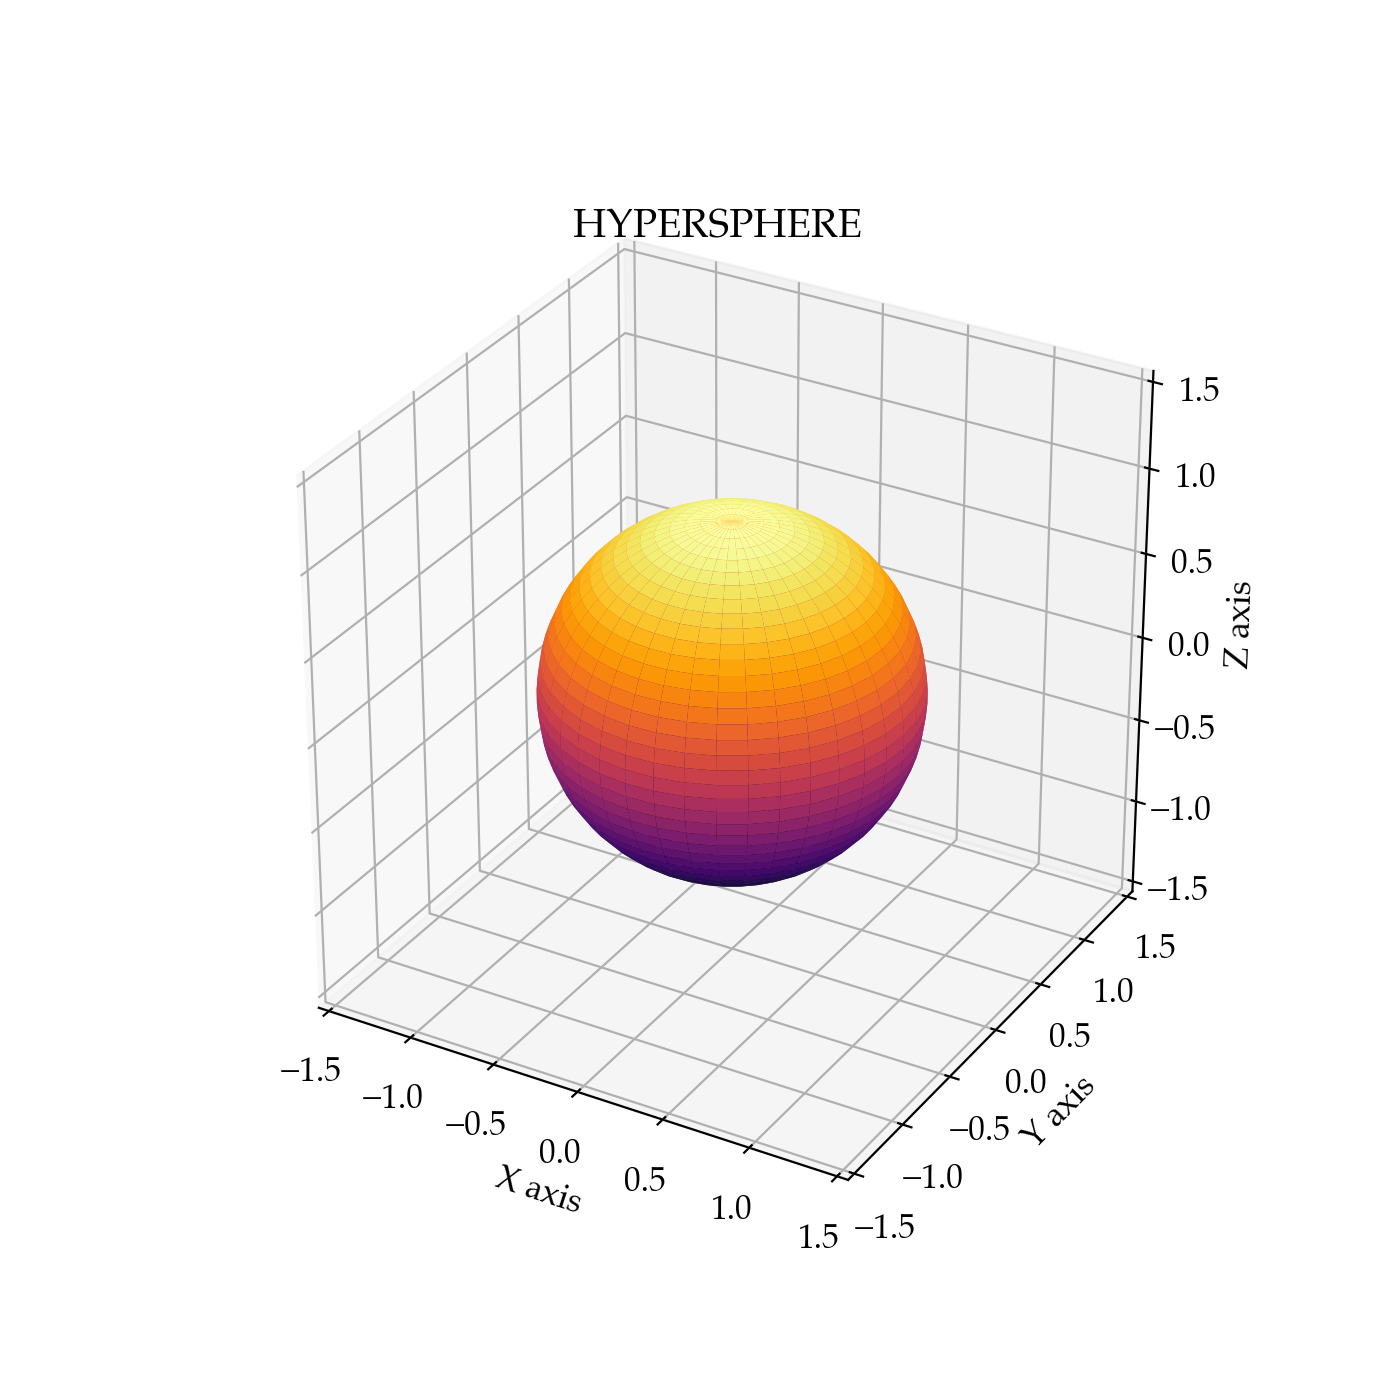

Text(0.5, 0.92, 'HYPERSPHERE')

In [3]:
fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(x, y, z, cmap=cm.inferno)
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_zlim(-1.5, 1.5)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.title('HYPERSPHERE')

In [4]:
xx = np.reshape(x, n ** 2, 1)
yy = np.reshape(y, n ** 2, 1)
zz = np.reshape(z, n ** 2, 1)

A = np.array([[1, .2, -0.9], [-1, 0.5, 1.1], [.4, 0, 1]])

coord = np.zeros((3, n ** 2))
for i in range(0, n ** 2):
    tmp = np.dot(A, np.array([[xx[i]], [yy[i]], [zz[i]]]))
    coord[0, i] = tmp[0]
    coord[1, i] = tmp[1]
    coord[2, i] = tmp[2]

xx = np.reshape(coord[0, :], (n, n))
yy = np.reshape(coord[1, :], (n, n))
zz = np.reshape(coord[2, :], (n, n))

<IPython.core.display.Javascript object>


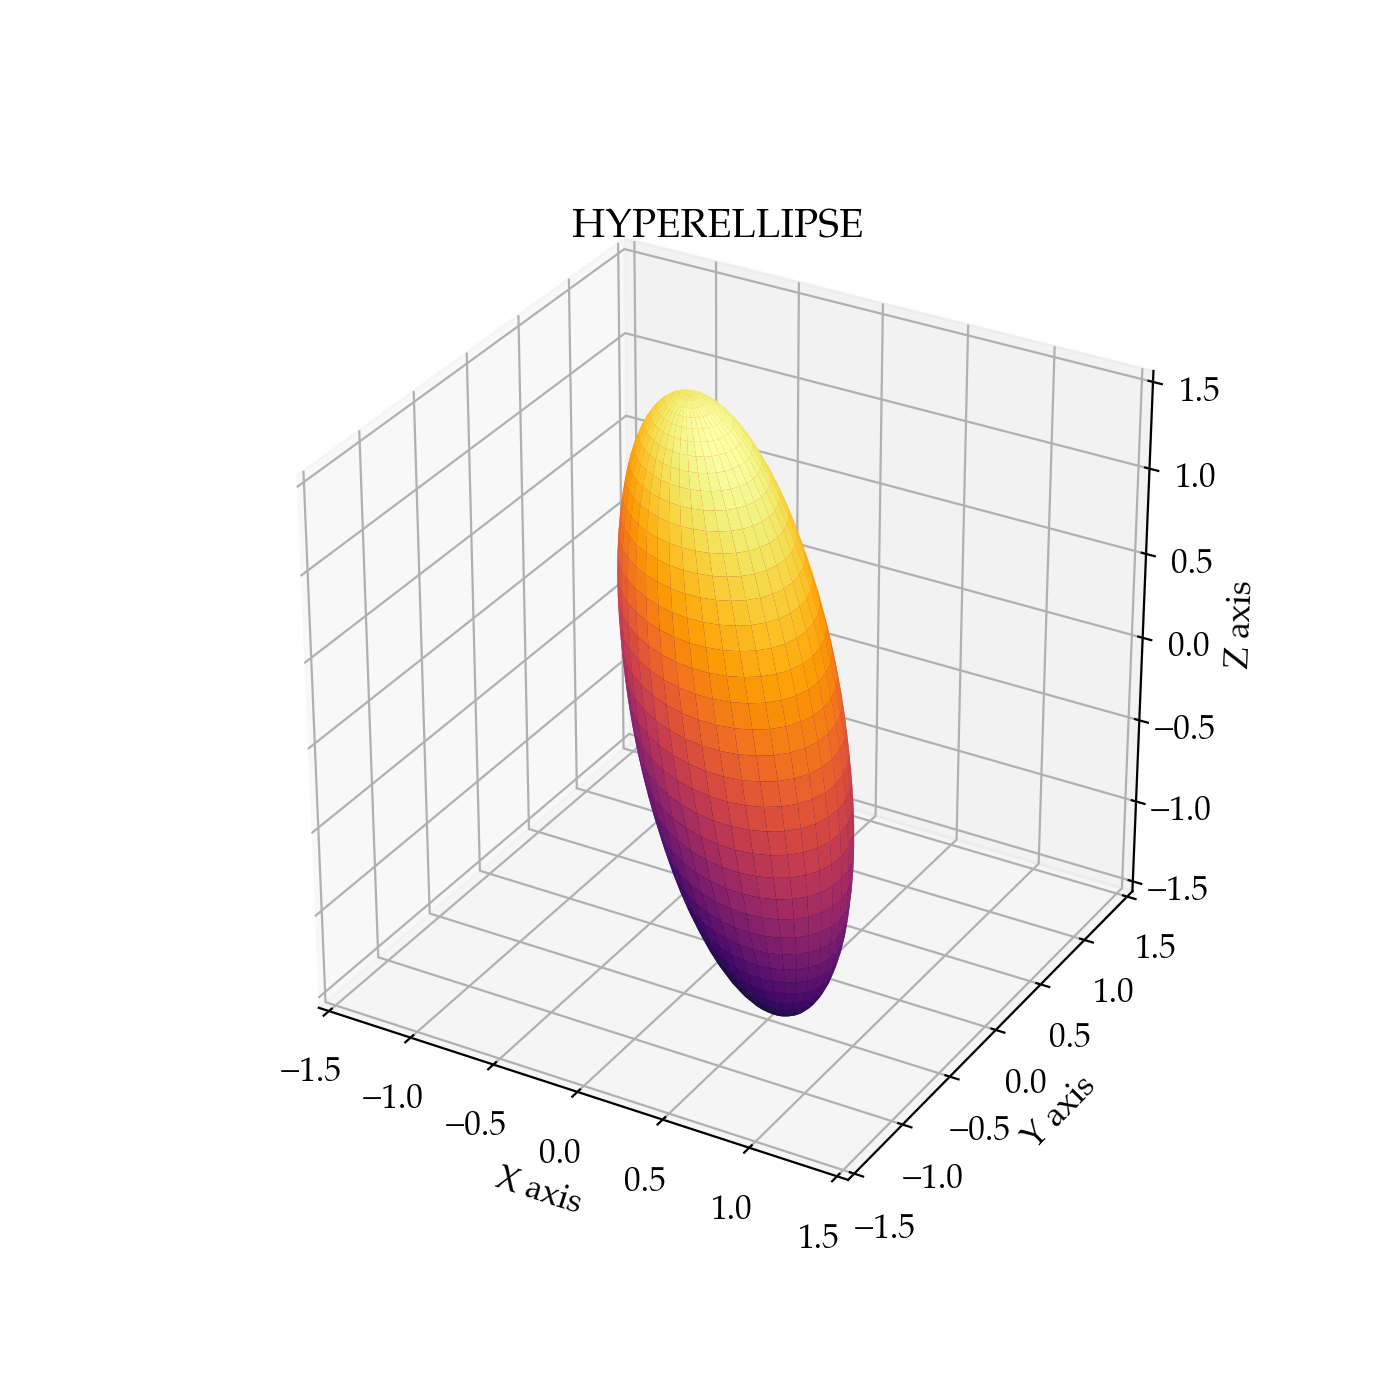

Text(0.5, 0.92, 'HYPERELLIPSE')

In [5]:
fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(xx, yy, zz, cmap=cm.inferno)
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_zlim(-1.5, 1.5)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.title('HYPERELLIPSE')

At this point we can decompose the matrix $A$ with the SVD algorithm and plot the principal component.

In [6]:
U, S, V = np.linalg.svd(A)
origin = [0, 0, 0]
first_pc = [U[0, 0] * S[0],
            U[1, 0] * S[0],
            U[2, 0] * S[0]]
second_pc = [U[0, 1] * S[1],
            U[1, 1] * S[1],
            U[2, 1] * S[1]]
third_pc = [U[0, 2] * S[2],
            U[1, 2] * S[2],
            U[2, 2] * S[2]]

<IPython.core.display.Javascript object>


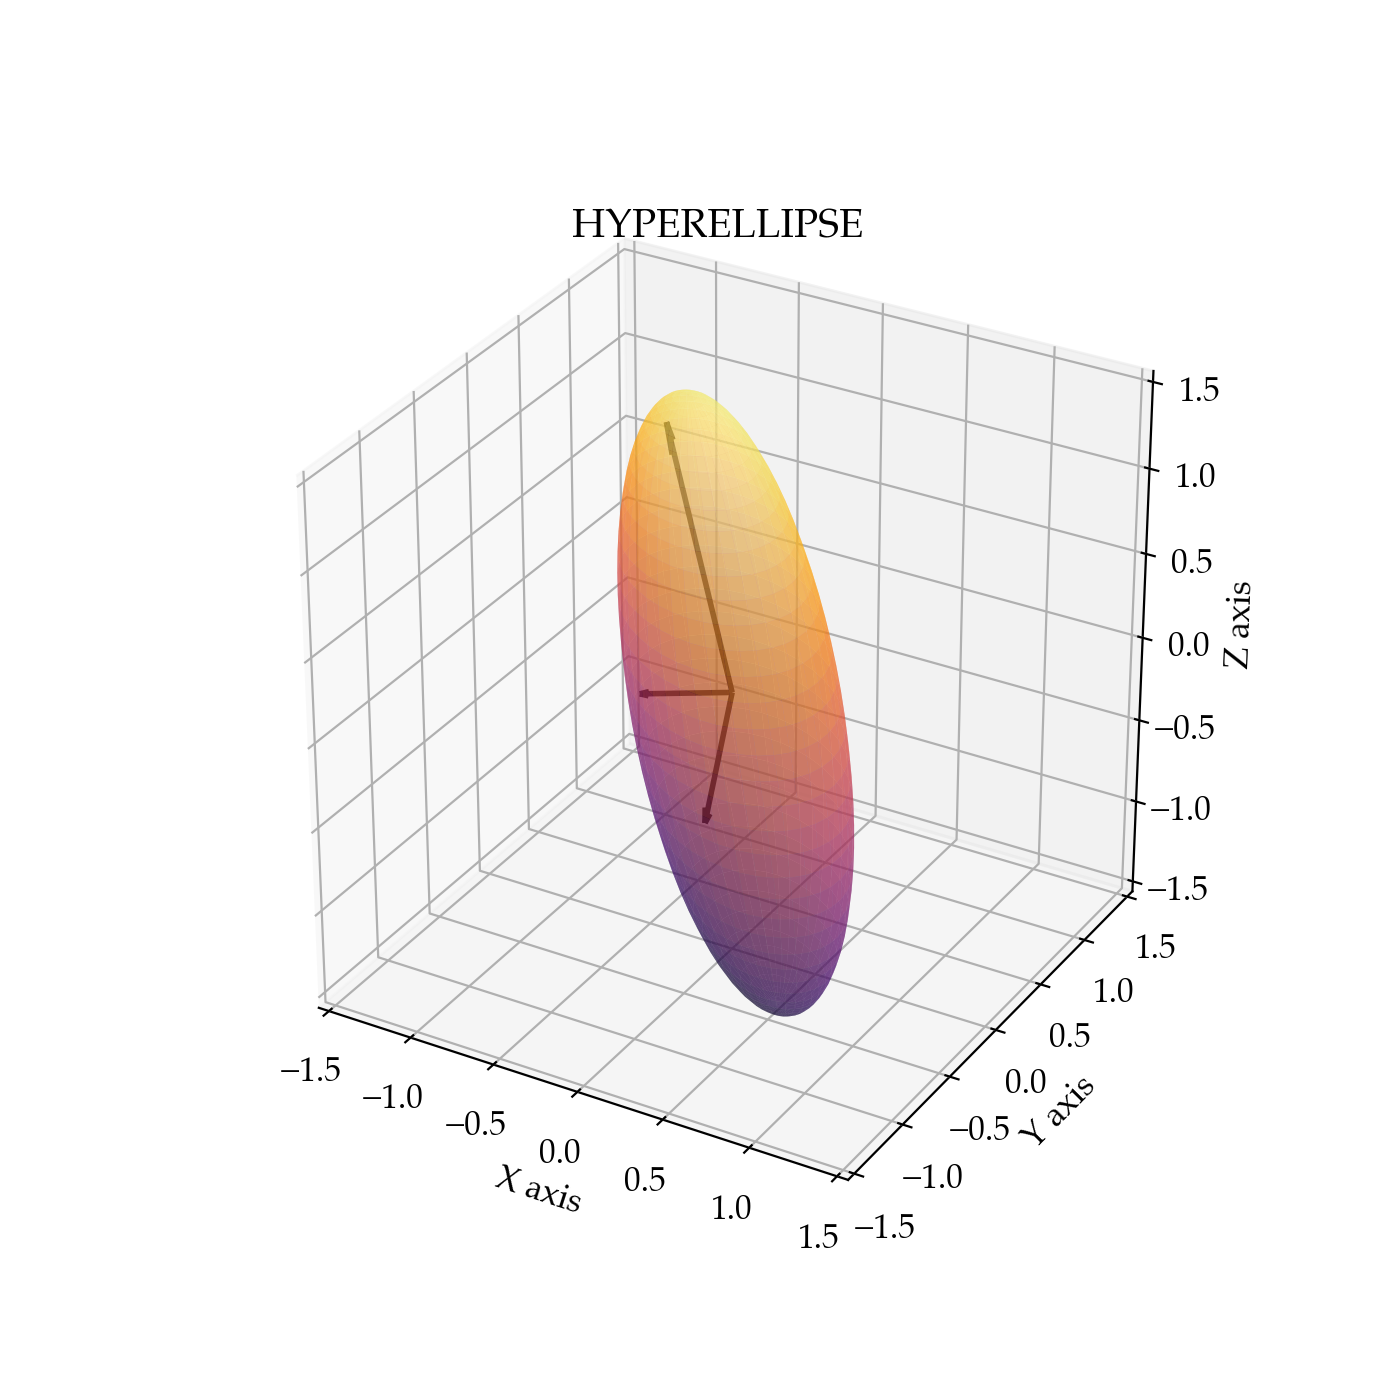

In [7]:
fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(xx, yy, zz, cmap=cm.inferno, alpha=0.5)
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.set_zlim(-1.5, 1.5)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.title('HYPERELLIPSE')
plt.quiver(origin[0],origin[1],origin[2], first_pc[0], first_pc[1], first_pc[2],
           linewidths=2, color='k', arrow_length_ratio=0.1)
ax.quiver(origin[0],origin[1],origin[2], second_pc[0], second_pc[1], second_pc[2],
          linewidths=2, color='k', arrow_length_ratio=0.1)
ax.quiver(origin[0],origin[1],origin[2], third_pc[0], third_pc[1], third_pc[2],
          linewidths=2, color='k', arrow_length_ratio=0.1)